In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.compose import ColumnTransformer,make_column_selector

from sklearn.metrics import classification_report,roc_auc_score,ConfusionMatrixDisplay,f1_score,accuracy_score

import tensorflow as tf
import tensorflow_addons as tfa

C:\ProgramData\anaconda3\envs\tf_gpu\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [3]:
df_train = pd.read_csv("train.csv")

In [4]:
df_train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [6]:
pusteTrain = df_train.isnull().sum().sort_values(ascending=False)
procentPustychTrain = df_train.isnull().sum()/df_train.count()
trainPuste = pd.concat([pusteTrain, procentPustychTrain], axis=1, keys=['Ilosc','Procent'])
trainPuste = pd.concat([pusteTrain, procentPustychTrain], axis=1, keys=['Ilosc','Procent'])
trainPuste

,Ilosc,Procent
Arrival Delay in Minutes,310,0.002992
Unnamed: 0,0,0.000000
Online boarding,0,0.000000
Departure Delay in Minutes,0,0.000000
Cleanliness,0,0.000000
Inflight service,0,0.000000
Checkin service,0,0.000000
Baggage handling,0,0.000000
Leg room service,0,0.000000
On-board service,0,0.000000


Można zauważyć, że procent wierszy w których występują puste komórki jest bardzo mały. Najbardziej efektywną opcją będzie zamiana wartości pustych na wynik mediany danych z tej kolumny.

In [7]:
df_train['Arrival Delay in Minutes'].fillna(value=df_train['Arrival Delay in Minutes'].median(axis=0),inplace=True)

In [8]:
pusteTrain = df_train.isnull().sum().sort_values(ascending=False)
procentPustychTrain = df_train.isnull().sum()/df_train.count()
trainPuste = pd.concat([pusteTrain, procentPustychTrain], axis=1, keys=['Ilosc','Procent'])
trainPuste = pd.concat([pusteTrain, procentPustychTrain], axis=1, keys=['Ilosc','Procent'])
trainPuste

,Ilosc,Procent
Unnamed: 0,0,0.0
Online boarding,0,0.0
Arrival Delay in Minutes,0,0.0
Departure Delay in Minutes,0,0.0
Cleanliness,0,0.0
Inflight service,0,0.0
Checkin service,0,0.0
Baggage handling,0,0.0
Leg room service,0,0.0
On-board service,0,0.0


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

<Axes: >

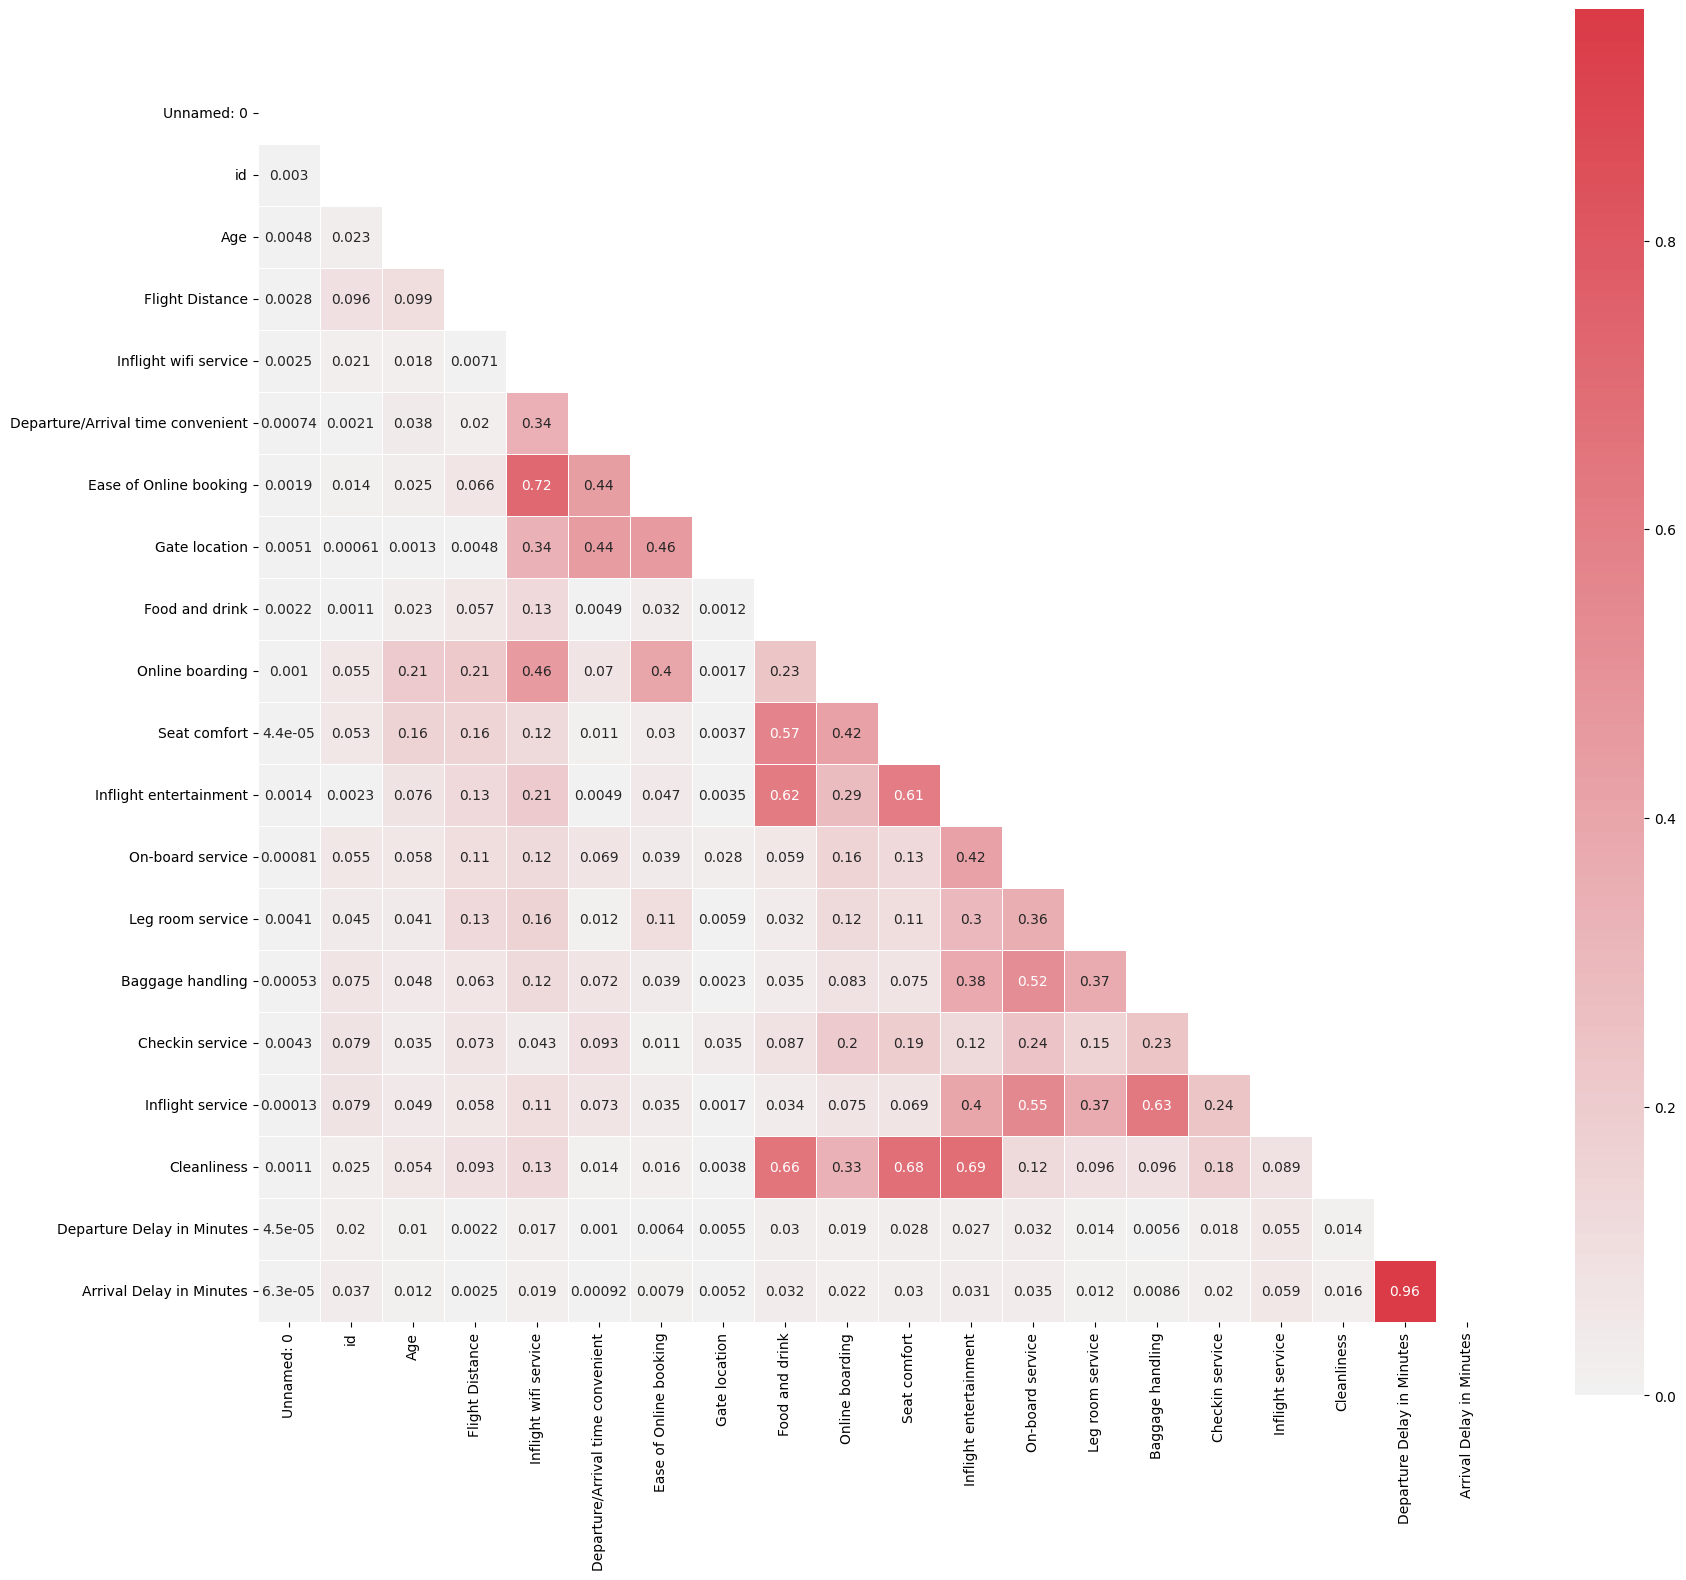

In [10]:
macierzKorelacji = abs(df_train.corr(numeric_only = True))
mask = np.triu(np.ones_like(macierzKorelacji, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(macierzKorelacji, mask=mask, cmap=cmap, vmin=0, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

Na podstawie macierzy korelacji zauważyć można, że kolumna "Unnamed: 0" oraz kolumna "id" nie mają żadnej relacji z innymi danymi. Kolumna "Unnamed: 0" przechowuje numer danego wiersza natomiast kolumna "id" najprawdopodobniej numer danego lotu bądź biletu nadany prawdopodobnie losowo. Można zatem usunąć obie kolumny.

In [11]:
df_train.drop(['Unnamed: 0','id'],axis=1,inplace=True)

Następnie zamieniono typ danych niektórych kolumn. Są to kolumny przechowujące opóźnienie przylotu, odlotu, wiek oraz dystans pokonany przez samolot.

In [12]:
for col in ['Arrival Delay in Minutes','Departure Delay in Minutes','Age','Flight Distance']:
    df_train[col]=df_train[col].astype('float64')

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  float64
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  float64
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [14]:
df_train.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.133392
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.649776
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


Jak można zauważyć większość kolumn posiada dane określające poziom zadowolenia. Mają one wartości od 0 do 5.

<Axes: xlabel='satisfaction', ylabel='count'>

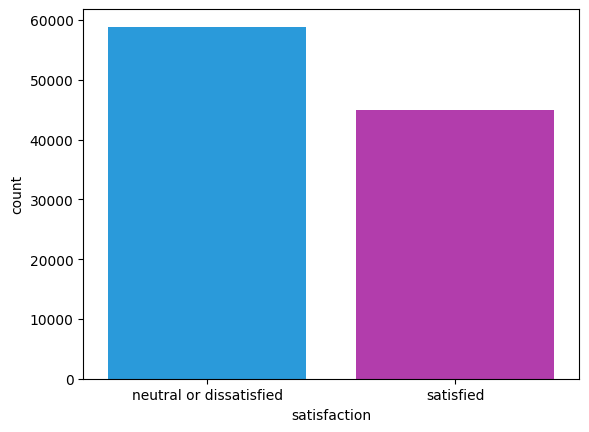

In [15]:
sns.countplot(x='satisfaction',data=df_train,palette=['#0DA2F7',"#C629BE"])

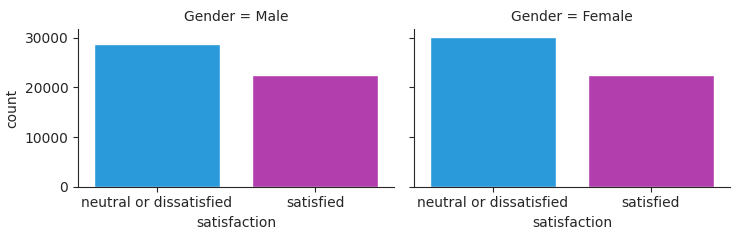

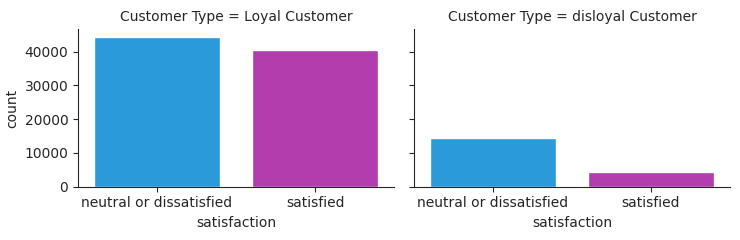

In [16]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="satisfaction", col="Gender", col_wrap=2, data=df_train, kind="count", height=2.5, aspect=1.5,palette=['#0DA2F7',"#C629BE"])  
    g = sns.catplot(x="satisfaction", col="Customer Type", col_wrap=2, data=df_train, kind="count", height=2.5, aspect=1.5, palette=['#0DA2F7',"#C629BE"])

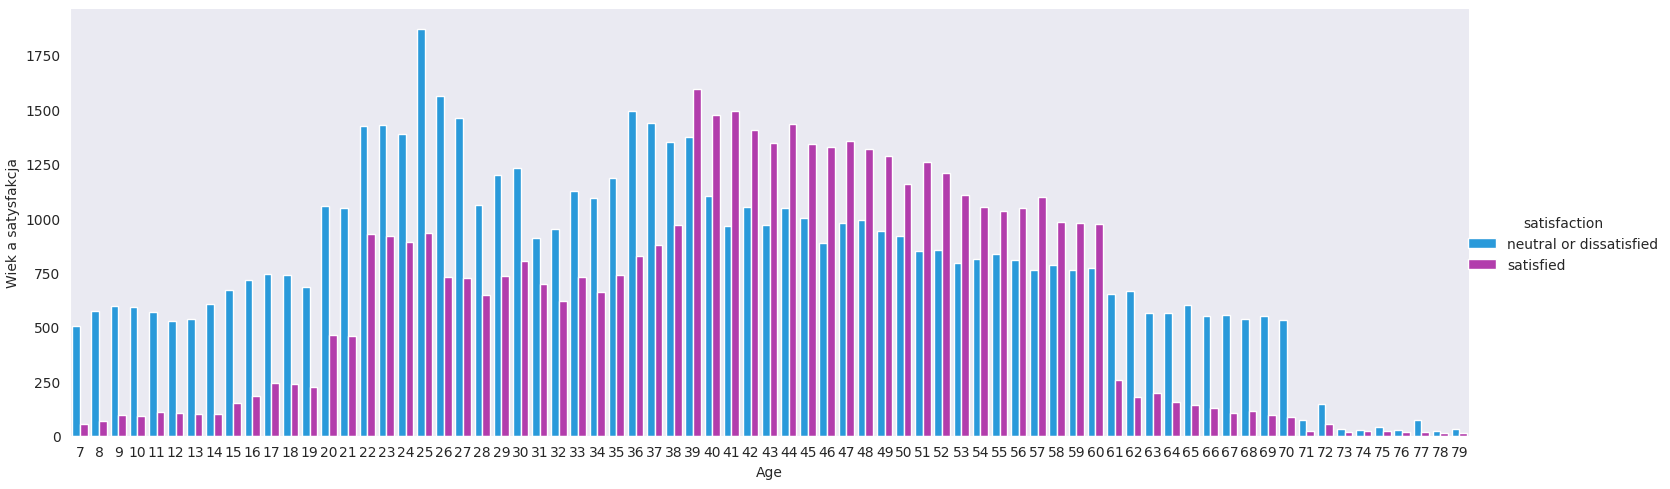

In [17]:
with sns.axes_style('dark'):
    g = sns.catplot(x = "Age", data=df_train, aspect=3.0, kind='count', hue='satisfaction', order=range(7, 80),palette=['#0DA2F7',"#C629BE"])
    g.set_ylabels('Wiek a satysfakcja')

Z wykresu można odczytać, że najwięcej osób zadowolonych z podrózy znajduje się w przedziale wiekowym 39-60. Osoby młodsze (7-21) w większości są niezadowolone z podróży.

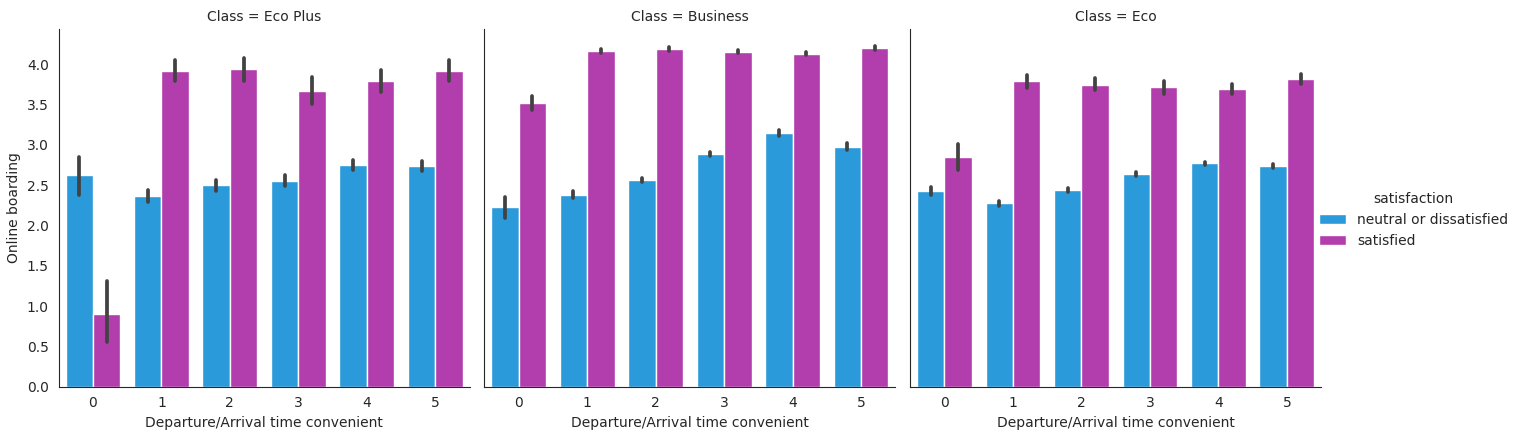

In [18]:
with sns.axes_style('white'):
    g = sns.catplot(x="Departure/Arrival time convenient", y="Online boarding", hue="satisfaction", col="Class", data=df_train, kind="bar", height=4.5, aspect=1.0,palette=['#0DA2F7',"#C629BE"])

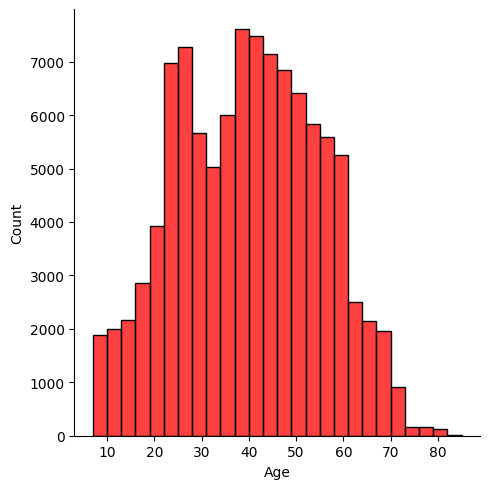

In [19]:
sns.displot(df_train, x="Age",binwidth = 3, color = "red")

In [20]:
df_train['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

Należy zamienić dane w kolumnie "satisfaction" aby były w formie 0 lub 1. Wartości "neutral or dissatisfied" zamieniono na 0 a wartości "satisfied" na 1.

In [21]:
df_train['satisfaction']=df_train['satisfaction'].apply(lambda x: 1 if(x=='satisfied') else 0)   

In [22]:
df_train['satisfaction'].value_counts()

satisfaction
0    58879
1    45025
Name: count, dtype: int64

Następnie zbiór train podzielono na X oraz y. X przechowuje wszystkie kolumny z wyjątkiem kolumny "satisfaction" natomiast y przechowuje jedynie kolumne "satisfaction"

In [23]:
X=df_train.drop(['satisfaction'],axis=1)
y=df_train[['satisfaction']]

In [24]:
X.head(2)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,13.0,Personal Travel,Eco Plus,460.0,3,4,3,1,...,5,5,4,3,4,4,5,5,25.0,18.0
1,Male,disloyal Customer,25.0,Business travel,Business,235.0,3,2,3,3,...,1,1,1,5,3,1,4,1,1.0,6.0


In [25]:
y.head(2)

,satisfaction
0,0
1,0


In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.15,random_state=42,stratify=y_train)

Za pomocą instrukcji split podzielono dane na X_train, X_test, y_train, y_test, X_val, y_val.

In [27]:
oh=OneHotEncoder(drop='first',handle_unknown='ignore')

ms,ss=MinMaxScaler(),StandardScaler()


ct=ColumnTransformer([
    ('cat_encoder',oh,make_column_selector(dtype_include='object')),
    ('num_encoder',ss,make_column_selector(dtype_include='float64'))
],remainder='passthrough',n_jobs=-1)

In [28]:
X_train=ct.fit_transform(X_train)
X_val=ct.transform(X_val)
X_test=ct.transform(X_test)

In [29]:
batch_size=256
num_layer=8
n=num_layer

In [30]:
data_tf_tr=tf.data.Dataset.from_tensor_slices((X_train, y_train))
data_tr_batches = data_tf_tr.batch(batch_size).cache().prefetch(tf.data.AUTOTUNE)

data_tf_val=tf.data.Dataset.from_tensor_slices((X_val, y_val))
data_val_batches = data_tf_val.batch(batch_size).cache().prefetch(tf.data.AUTOTUNE)

data_tf_te=tf.data.Dataset.from_tensor_slices((X_test, y_test))
data_te_batches = data_tf_te.batch(batch_size).cache().prefetch(tf.data.AUTOTUNE)

data_tf_tre=tf.data.Dataset.from_tensor_slices(X_test)
data_tre_batches = data_tf_tre.batch(batch_size).cache().prefetch(tf.data.AUTOTUNE)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Input
from tensorflow.keras.callbacks import EarlyStopping

e=EarlyStopping(patience=5,restore_best_weights=True,verbose=1)

In [32]:
model=Sequential()


model.add(Input(shape=(X_train.shape[1],)))


for counter in range(n):
    model.add(Dense(n*X_train.shape[1],activation='relu'))


model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics = [ 'accuracy',
                         tf.keras.metrics.AUC(name='AUC_ROC',curve='ROC',num_thresholds=10000) ,
                         tfa.metrics.F1Score(name='F1_Score',num_classes=1,average='macro',threshold=0.5)
                        ]
             )

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 184)               4416      
                                                                 
 dense_1 (Dense)             (None, 184)               34040     
                                                                 
 dense_2 (Dense)             (None, 184)               34040     
                                                                 
 dense_3 (Dense)             (None, 184)               34040     
                                                                 
 dense_4 (Dense)             (None, 184)               34040     
                                                                 
 dense_5 (Dense)             (None, 184)               34040     
                                                                 
 dense_6 (Dense)             (None, 184)               3

In [34]:
%%time
history=model.fit(data_tr_batches,epochs=100,callbacks=[e],validation_data=data_val_batches,verbose=1)

Epoch 1/100
276/276 [==============================] - 4s 6ms/step - loss: 0.2447 - accuracy: 0.8954 - AUC_ROC: 0.9622 - F1_Score: 0.8789 - val_loss: 0.1542 - val_accuracy: 0.9358 - val_AUC_ROC: 0.9847 - val_F1_Score: 0.9242
Epoch 2/100
276/276 [==============================] - 2s 5ms/step - loss: 0.1495 - accuracy: 0.9390 - AUC_ROC: 0.9854 - F1_Score: 0.9285 - val_loss: 0.1366 - val_accuracy: 0.9441 - val_AUC_ROC: 0.9889 - val_F1_Score: 0.9356
Epoch 3/100
276/276 [==============================] - 2s 6ms/step - loss: 0.1291 - accuracy: 0.9464 - AUC_ROC: 0.9890 - F1_Score: 0.9369 - val_loss: 0.1267 - val_accuracy: 0.9475 - val_AUC_ROC: 0.9903 - val_F1_Score: 0.9393
Epoch 4/100
276/276 [==============================] - 2s 8ms/step - loss: 0.1198 - accuracy: 0.9500 - AUC_ROC: 0.9905 - F1_Score: 0.9410 - val_loss: 0.1168 - val_accuracy: 0.9525 - val_AUC_ROC: 0.9912 - val_F1_Score: 0.9433
Epoch 5/100
276/276 [==============================] - 2s 8ms/step - loss: 0.1138 - accuracy: 0.9524

<Axes: >

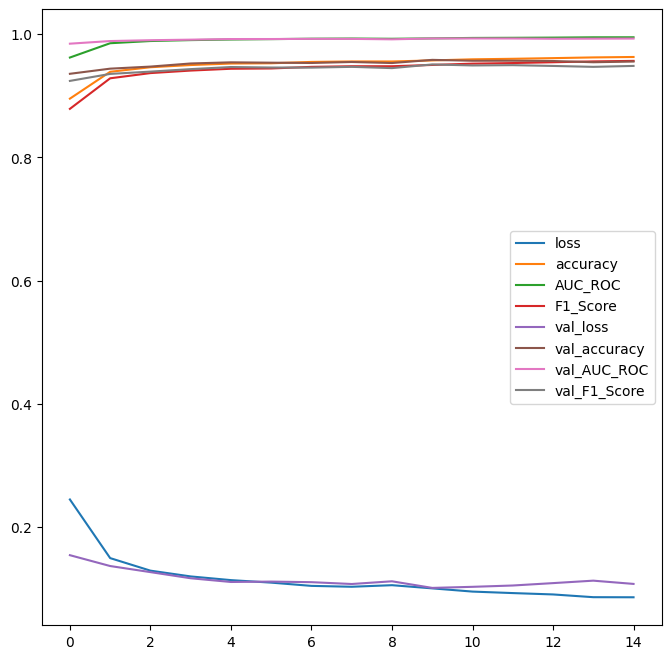

In [35]:
d1=pd.DataFrame(history.history)
d1.plot(figsize=(8,8))

In [36]:
model.evaluate(data_te_batches)

82/82 [==============================] - 0s 4ms/step - loss: 0.0993 - accuracy: 0.9572 - AUC_ROC: 0.9933 - F1_Score: 0.9498


[0.09927205741405487,
 0.9572205543518066,
 0.9933072924613953,
 0.9498222470283508]

In [37]:
score_dict={}
pred=(model.predict(data_tre_batches)>0.5).astype(int)

print(classification_report(pred,y_test))

score_dict['model']={
        'roc_auc_score':roc_auc_score(y_test.values,pred),
        'f1_score':f1_score(y_test.values,pred),
        'accuracy_score':accuracy_score(y_test.values,pred)
    }

82/82 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     12069
           1       0.93      0.97      0.95      8712

    accuracy                           0.96     20781
   macro avg       0.95      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



In [38]:
score_pd=pd.DataFrame(score_dict).transpose().sort_values('roc_auc_score',ascending=False)
score_pd

,accuracy_score,f1_score,roc_auc_score
model,0.957221,0.949822,0.954532


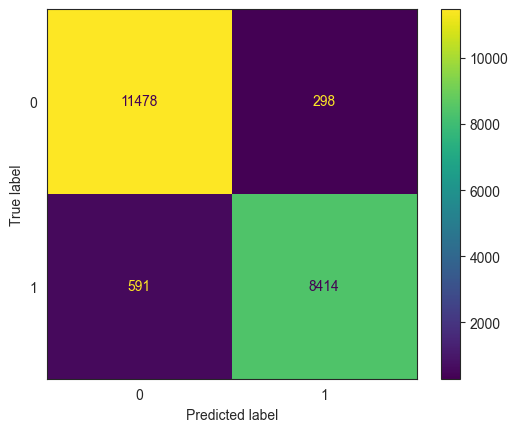

In [39]:
sns.set_style('white')
ConfusionMatrixDisplay.from_predictions(y_test.values,pred)

Wczytano dostarczony plik csv zawierający dane do testowania. Wykonano kroki analogiczne do tych, które użyto przy zbiorze train. Usunięto kolumny 'Unnamed: 0' oraz 'id'.

In [40]:
df_test=pd.read_csv("test.csv")

df_test.drop(['Unnamed: 0','id'],axis=1,inplace=True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  object 
 1   Customer Type                      25976 non-null  object 
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  object 
 4   Class                              25976 non-null  object 
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int

In [42]:
pusteTest = df_test.isnull().sum().sort_values(ascending=False)
procentPustychTest = df_test.isnull().sum()/df_test.count()
testPuste = pd.concat([pusteTest, procentPustychTest], axis=1, keys=['Ilosc','Procent'])
testPuste

,Ilosc,Procent
Arrival Delay in Minutes,83,0.003205
Gender,0,0.000000
Seat comfort,0,0.000000
Departure Delay in Minutes,0,0.000000
Cleanliness,0,0.000000
Inflight service,0,0.000000
Checkin service,0,0.000000
Baggage handling,0,0.000000
Leg room service,0,0.000000
On-board service,0,0.000000


Zamieniono typ danych niektóych kolumn z int na float. Wartości puste zamieniono na mediane z odpowiedniej kolumny ze zbioru do trenigu ponieważ posiado on więcej danych.

In [43]:
for col in ['Arrival Delay in Minutes','Departure Delay in Minutes','Age','Flight Distance']:
    df_test[col]=df_test[col].astype('float64')
df_test['Arrival Delay in Minutes'].fillna(value=df_train['Arrival Delay in Minutes'].median(axis=0),inplace=True)

Zamieniono wartości kolumny satisfaction na 0 oraz 1. Oraz podzielono zbiór na X_df oraz y_df analogicznie jak w poprzednich krokach.

In [44]:
df_test['satisfaction']=df_test['satisfaction'].apply(lambda x: 1 if(x=='satisfied') else 0)    

X_df=df_test.drop(['satisfaction'],axis=1)
y_df=df_test[['satisfaction']]

In [45]:
X_df=ct.transform(X_df)

In [46]:
data_df_tf_tre=tf.data.Dataset.from_tensor_slices(X_df)
data_df_tre_batches = data_df_tf_tre.batch(batch_size).cache().prefetch(tf.data.AUTOTUNE)

102/102 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     14573
           1       0.97      0.93      0.95     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.95      0.96     25976
weighted avg       0.96      0.96      0.96     25976



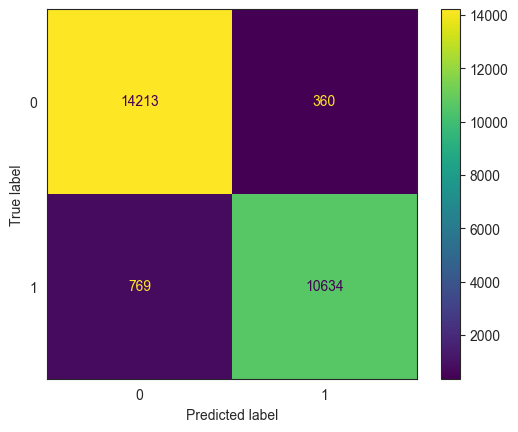

In [47]:
pred_test=(model.predict(data_df_tre_batches)>0.5).astype(int)

print(classification_report(y_df.values,pred_test))

ConfusionMatrixDisplay.from_predictions(y_df.values,pred_test)